# hadron-Ar_XS

This ipython notebook is a tutorial for the hadron-Ar cross-section measurement using slicing method.

### Import python packages and define physical quantities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
#import pylandau

# constants
NA = 6.02214076e23 # Avogadro constant (mol^{-1})

# probe particle (e.g. pi+)
m_probe = 139.57 # mass (MeV)

# target material (e.g. liquid argon)
rho_tar = 1.4 # density (g/cm^3)
M_tar = 39.95 # molar mass (g/mol)
n_tar = rho_tar*NA/M_tar # number density (cm^{-3})


### Simulation
Generate probe-material scattering events according to user-defined cross-sections. The material is not a thin-target, but it is filled in a large tank. The probe will be detected as a track in the material. Each event has three properties, the initial kinetic energy of the track, the kinetic energy at the end of the track, and a flag indicating what type of interaction it is between probe and material.

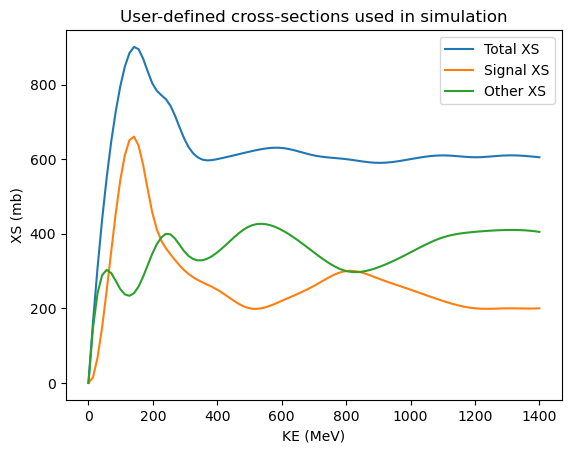

In [2]:
# user-defined cross-section curves (unit: mb)
# tot: total XS; ex: signal exclusive XS; oth: other exclusive XS
# So we have XS_tot = XS_ex + XS_oth
# Caveat: need to make sure XS_tot, XS_ex, XS_oth are all positive

usr_define_xs_curve_method = 2
if usr_define_xs_curve_method == 1: # use polynomial to define cross-section curves
    XS_gen_tot = np.poly1d([-2.689e-20, 1.880e-16, -5.497e-13, 8.701e-10, -8.047e-7, 4.358e-4, -1.298e-1, 1.783e1, 0])
    XS_gen_ex = np.poly1d([1.372e-20, -7.150e-17, 1.302e-13, -6.930e-11, -7.217e-8, 1.154e-4, -5.600e-2, 9.891, 0])
    XS_gen_oth = XS_gen_tot - XS_gen_ex
elif usr_define_xs_curve_method == 2: # use spline interpolation to define cross-section curves
    XS_gen_tot = CubicSpline(*np.transpose([[0,0], [50,500], [100,800], [150,900], [200,800], [250,750], [300,650], [400,600], [500,620], [600,630], [700,610], [800,600], [900,590], [1000,600], [1100,610], [1200,605], [1300,610], [1400,605], [1500,600]]))
    XS_gen_ex = CubicSpline(*np.transpose([[0,0], [50,200], [100,550], [150,650], [200,450], [250,350], [300,300], [400,250], [500,200], [600,220], [700,260], [800,300], [900,280], [1000,250], [1100,220], [1200,200], [1300,200], [1400,200], [1500,220]]))
    XS_gen_oth = lambda x: XS_gen_tot(x) - XS_gen_ex(x)

# draw cross-section curves
xx = np.linspace(0,1400,100)
plt.plot(xx,XS_gen_tot(xx), label="Total XS")
plt.plot(xx,XS_gen_ex(xx), label="Signal XS")
plt.plot(xx,XS_gen_oth(xx), label="Other XS")
plt.xlabel("KE (MeV)")
plt.ylabel("XS (mb)") # 1 mb = 10^{-27} cm^2
plt.title("User-defined cross-sections used in simulation")
plt.legend()
plt.show()


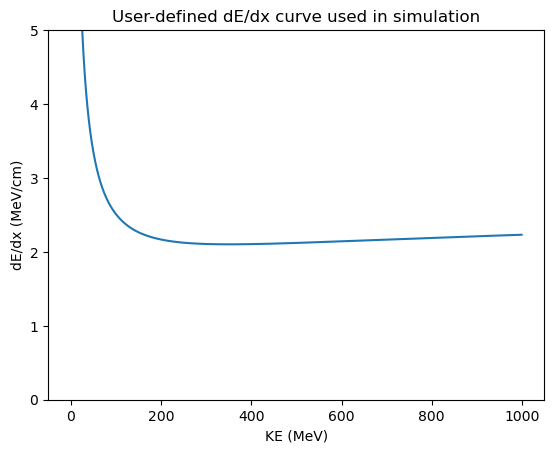

In [3]:
# dE/dx simulation

# dE/dx as a function of KE described by Bethe-Bloch formula
dEdx_xx = np.arange(0,1000.1,1)
dEdx_pts = [100,59.0587,34.5444,25.1069,20.0045,16.7771,14.5392,12.8904,11.6221,10.6144,9.79349,9.11116,8.53461,8.04072,7.61272,7.23811,6.90739,6.61321,6.34978,6.11249,5.89761,5.7021,5.52343,5.35952,5.20861,5.06921,4.94005,4.82005,4.70826,4.60389,4.50621,4.41461,4.32855,4.24754,4.17115,4.099,4.03076,3.96612,3.90481,3.84659,3.79122,3.73851,3.68828,3.64036,3.59459,3.55085,3.50899,3.46892,3.43051,3.39367,3.35832,3.32436,3.29171,3.26031,3.23009,3.20098,3.17293,3.14589,3.1198,3.09462,3.0703,3.0468,3.02408,3.00211,2.98085,2.96027,2.94034,2.92103,2.90232,2.88418,2.86658,2.84951,2.83294,2.81685,2.80122,2.78604,2.77128,2.75694,2.74299,2.72942,2.71622,2.70337,2.69086,2.67868,2.66682,2.65526,2.644,2.63303,2.62233,2.61189,2.60171,2.59179,2.5821,2.57265,2.56342,2.55441,2.54562,2.53703,2.52864,2.52044,2.51243,2.5046,2.49695,2.48947,2.48216,2.475,2.46801,2.46117,2.45448,2.44793,2.44152,2.43525,2.42911,2.4231,2.41722,2.41146,2.40582,2.40029,2.39488,2.38958,2.38439,2.3793,2.37432,2.36827,2.36348,2.35879,2.35419,2.34967,2.34524,2.3409,2.33663,2.33245,2.32835,2.32432,2.32037,2.31649,2.31268,2.30894,2.30527,2.30167,2.29813,2.29466,2.29125,2.2879,2.28461,2.28138,2.2782,2.27509,2.27202,2.26902,2.26606,2.26316,2.2603,2.2575,2.25474,2.25203,2.24937,2.24676,2.24419,2.24166,2.23918,2.23674,2.23434,2.23198,2.22966,2.22738,2.22513,2.22293,2.22076,2.21863,2.21654,2.21447,2.21245,2.21045,2.20849,2.20657,2.20467,2.20281,2.20097,2.19917,2.19739,2.19565,2.19393,2.19224,2.19058,2.18895,2.18734,2.18576,2.1842,2.18267,2.18117,2.17969,2.17823,2.1768,2.17539,2.174,2.17264,2.17129,2.16997,2.16867,2.16739,2.16614,2.1649,2.16368,2.16248,2.1613,2.16014,2.159,2.15788,2.15678,2.15569,2.15462,2.15357,2.15254,2.15152,2.15052,2.14953,2.14857,2.14761,2.14668,2.14575,2.14485,2.14395,2.14308,2.14221,2.14137,2.14053,2.13971,2.1389,2.13811,2.13733,2.13656,2.1358,2.13506,2.13433,2.13361,2.13291,2.13221,2.13153,2.13086,2.1302,2.12955,2.12892,2.12829,2.12768,2.12707,2.12648,2.12589,2.12532,2.12476,2.1242,2.12366,2.12312,2.1226,2.12208,2.12158,2.12108,2.12059,2.12011,2.11964,2.11918,2.11873,2.11828,2.11784,2.11741,2.11699,2.11658,2.11618,2.11578,2.11539,2.11501,2.11463,2.11427,2.11391,2.11355,2.11321,2.11287,2.11254,2.11221,2.11189,2.11158,2.11128,2.11098,2.11069,2.1104,2.11012,2.10985,2.10958,2.10932,2.10906,2.10881,2.10857,2.10833,2.1081,2.10787,2.10765,2.10743,2.10722,2.10701,2.10681,2.10662,2.10643,2.10624,2.10606,2.10588,2.10571,2.10555,2.10539,2.10523,2.10508,2.10493,2.10479,2.10465,2.10451,2.10438,2.10426,2.10414,2.10402,2.10391,2.1038,2.10369,2.10359,2.10349,2.1034,2.10331,2.10322,2.10314,2.10306,2.10299,2.10292,2.10285,2.10279,2.10273,2.10267,2.10262,2.10257,2.10252,2.10248,2.10244,2.1024,2.10237,2.10234,2.10231,2.10228,2.10226,2.10224,2.10223,2.10222,2.10221,2.1022,2.1022,2.10219,2.1022,2.1022,2.10221,2.10222,2.10223,2.10224,2.10226,2.10228,2.10231,2.10233,2.10236,2.10239,2.10242,2.10246,2.10249,2.10253,2.10257,2.10262,2.10266,2.10271,2.10276,2.10282,2.10287,2.10293,2.10299,2.10305,2.10311,2.10318,2.10325,2.10332,2.10339,2.10346,2.10354,2.10361,2.10369,2.10377,2.10386,2.10394,2.10403,2.10412,2.10421,2.1043,2.10439,2.10449,2.10458,2.10468,2.10478,2.10489,2.10499,2.10509,2.1052,2.10531,2.10542,2.10553,2.10564,2.10576,2.10587,2.10599,2.10611,2.10623,2.10635,2.10647,2.1066,2.10672,2.10685,2.10698,2.10711,2.10724,2.10737,2.10751,2.10764,2.10778,2.10791,2.10805,2.10819,2.10833,2.10848,2.10862,2.10876,2.10891,2.10906,2.1092,2.10935,2.1095,2.10965,2.10981,2.10996,2.11011,2.11027,2.11042,2.11058,2.11074,2.1109,2.11106,2.11122,2.11138,2.11155,2.11171,2.11188,2.11204,2.11221,2.11238,2.11255,2.11271,2.11289,2.11306,2.11323,2.1134,2.11358,2.11375,2.11393,2.1141,2.11428,2.11446,2.11463,2.11481,2.11499,2.11518,2.11536,2.11554,2.11572,2.11591,2.11609,2.11628,2.11646,2.11665,2.11684,2.11702,2.11721,2.1174,2.11759,2.11778,2.11797,2.11816,2.11836,2.11855,2.11874,2.11894,2.11913,2.11933,2.11952,2.11972,2.11992,2.12011,2.12031,2.12051,2.12071,2.12091,2.12111,2.12131,2.12151,2.12171,2.12192,2.12212,2.12232,2.12253,2.12273,2.12293,2.12314,2.12334,2.12355,2.12376,2.12396,2.12417,2.12438,2.12459,2.1248,2.12501,2.12522,2.12542,2.12564,2.12585,2.12606,2.12627,2.12648,2.12669,2.12691,2.12712,2.12733,2.12754,2.12776,2.12797,2.12819,2.1284,2.12862,2.12883,2.12905,2.12927,2.12948,2.1297,2.12992,2.13014,2.13035,2.13057,2.13079,2.13101,2.13123,2.13145,2.13167,2.13189,2.13211,2.13233,2.13255,2.13277,2.13299,2.13321,2.13343,2.13365,2.13388,2.1341,2.13432,2.13455,2.13477,2.13499,2.13522,2.13544,2.13566,2.13589,2.13611,2.13634,2.13656,2.13679,2.13701,2.13724,2.13746,2.13769,2.13791,2.13814,2.13837,2.13859,2.13882,2.13905,2.13927,2.1395,2.13973,2.13996,2.14018,2.14041,2.14064,2.14087,2.14109,2.14132,2.14155,2.14178,2.14201,2.14224,2.14247,2.1427,2.14293,2.14315,2.14338,2.14361,2.14384,2.14407,2.1443,2.14453,2.14476,2.14499,2.14522,2.14546,2.14569,2.14592,2.14615,2.14638,2.14661,2.14684,2.14707,2.1473,2.14753,2.14777,2.148,2.14823,2.14846,2.14869,2.14892,2.14916,2.14939,2.14962,2.14985,2.15008,2.15032,2.15055,2.15078,2.15101,2.15124,2.15148,2.15171,2.15194,2.15217,2.15241,2.15264,2.15287,2.1531,2.15334,2.15357,2.1538,2.15404,2.15427,2.1545,2.15473,2.15497,2.1552,2.15543,2.15567,2.1559,2.15613,2.15636,2.1566,2.15683,2.15706,2.1573,2.15753,2.15776,2.158,2.15823,2.15846,2.1587,2.15893,2.15916,2.1594,2.15963,2.15986,2.16009,2.16033,2.16056,2.16079,2.16103,2.16126,2.16149,2.16173,2.16196,2.16219,2.16243,2.16266,2.16289,2.16312,2.16336,2.16359,2.16382,2.16406,2.16429,2.16452,2.16475,2.16499,2.16522,2.16545,2.16568,2.16592,2.16615,2.16638,2.16661,2.16685,2.16708,2.16731,2.16754,2.16778,2.16801,2.16824,2.16847,2.16871,2.16894,2.16917,2.1694,2.16963,2.16987,2.1701,2.17033,2.17056,2.17079,2.17102,2.17126,2.17149,2.17172,2.17195,2.17218,2.17241,2.17265,2.17288,2.17311,2.17334,2.17357,2.1738,2.17403,2.17426,2.17449,2.17472,2.17495,2.17519,2.17542,2.17565,2.17588,2.17611,2.17634,2.17657,2.1768,2.17703,2.17726,2.17749,2.17772,2.17795,2.17818,2.17841,2.17864,2.17887,2.1791,2.17932,2.17955,2.17978,2.18001,2.18024,2.18047,2.1807,2.18093,2.18116,2.18139,2.18161,2.18184,2.18207,2.1823,2.18253,2.18276,2.18298,2.18321,2.18344,2.18367,2.1839,2.18412,2.18435,2.18458,2.18481,2.18503,2.18526,2.18549,2.18571,2.18594,2.18617,2.18639,2.18662,2.18685,2.18707,2.1873,2.18753,2.18775,2.18798,2.1882,2.18843,2.18866,2.18888,2.18911,2.18933,2.18956,2.18978,2.19001,2.19023,2.19046,2.19068,2.19091,2.19113,2.19136,2.19158,2.19181,2.19203,2.19226,2.19248,2.1927,2.19293,2.19315,2.19338,2.1936,2.19382,2.19405,2.19427,2.19449,2.19472,2.19494,2.19516,2.19538,2.19561,2.19583,2.19605,2.19627,2.1965,2.19672,2.19694,2.19716,2.19738,2.19761,2.19783,2.19805,2.19827,2.19849,2.19871,2.19893,2.19916,2.19938,2.1996,2.19982,2.20004,2.20026,2.20048,2.2007,2.20092,2.20114,2.20136,2.20158,2.2018,2.20202,2.20224,2.20246,2.20268,2.2029,2.20311,2.20333,2.20355,2.20377,2.20399,2.20421,2.20443,2.20464,2.20486,2.20508,2.2053,2.20552,2.20573,2.20595,2.20617,2.20639,2.2066,2.20682,2.20704,2.20725,2.20747,2.20769,2.2079,2.20812,2.20834,2.20855,2.20877,2.20898,2.2092,2.20941,2.20963,2.20985,2.21006,2.21028,2.21049,2.21071,2.21092,2.21114,2.21135,2.21156,2.21178,2.21199,2.21221,2.21242,2.21264,2.21285,2.21306,2.21328,2.21349,2.2137,2.21392,2.21413,2.21434,2.21455,2.21477,2.21498,2.21519,2.2154,2.21562,2.21583,2.21604,2.21625,2.21646,2.21668,2.21689,2.2171,2.21731,2.21752,2.21773,2.21794,2.21815,2.21836,2.21857,2.21879,2.219,2.21921,2.21942,2.21963,2.21984,2.22004,2.22025,2.22046,2.22067,2.22088,2.22109,2.2213,2.22151,2.22172,2.22193,2.22213,2.22234,2.22255,2.22276,2.22297,2.22318,2.22338,2.22359,2.2238,2.22401,2.22421,2.22442,2.22463,2.22483,2.22504,2.22525,2.22545,2.22566,2.22587,2.22607,2.22628,2.22648,2.22669,2.2269,2.2271,2.22731,2.22751,2.22772,2.22792,2.22813,2.22833,2.22854,2.22874,2.22895,2.22915,2.22935,2.22956,2.22976,2.22997,2.23017,2.23037,2.23058,2.23078,2.23098,2.23119,2.23139,2.23159,2.23179,2.232]
dEdx_BB = lambda KE: np.interp(KE, dEdx_xx, dEdx_pts) # input from external pi-Ar dE/dx curve
# plot the simulated dE/dx curve
xx = np.arange(0,1000,1)
plt.plot(xx, dEdx_BB(xx), "-")
plt.ylim([0,5])
plt.xlabel("KE (MeV)")
plt.ylabel("dE/dx (MeV/cm)")
plt.title("User-defined dE/dx curve used in simulation")
plt.show()

# dE/dx distribution with the mean value provided
def dEdx_rdm(dEdx_mean):
    return np.random.chisquare(dEdx_mean) # Currently using chi^2 distribution. TB updated to Landau distribution
# plot the dE/dx curve with a certain mean value (TB added)

In [4]:
'''We divide the track into several steps with a certain path length, 
and calculate its possibility to have interactions in each step,
and use random number to decide if it interacts or not in each step.
'''

def if_interaction_step(KE, x_step): # whether the probe particle interacts with the material atom in a step
    
    Pint_ex = n_tar * XS_gen_ex(KE)/1e27 * x_step # possibility to have the signal interaction in a step
    Pint_oth = n_tar * XS_gen_oth(KE)/1e27 * x_step # possibility to have other interactions in a step
    
    judg = np.random.rand()
    if (judg < Pint_ex):
        return 1 # signal interaction
    elif (judg < Pint_ex+Pint_oth):
        return 2 # other interactions
    else:
        return 0 # no interaction

def interaction_sim(KE, x_step): # simulate step-by-step, until the probe interacts with the material atom or stops to rest
    flag = 0
    while flag == 0:
        flag = if_interaction_step(KE, x_step)
        dEdx = dEdx_rdm(dEdx_BB(KE))
        Edeposition = dEdx * x_step
        KE -= Edeposition
        if (KE <= 0):
            return 0, 0
    return KE, flag # the final energy of the probe particle; a flag indicating the type of interaction

#### Generate the simulation sample

Number of events: 10000
  processing events 0/10000...
  processing events 1000/10000...
  processing events 2000/10000...
  processing events 3000/10000...
  processing events 4000/10000...
  processing events 5000/10000...
  processing events 6000/10000...
  processing events 7000/10000...
  processing events 8000/10000...
  processing events 9000/10000...
Sample generated.


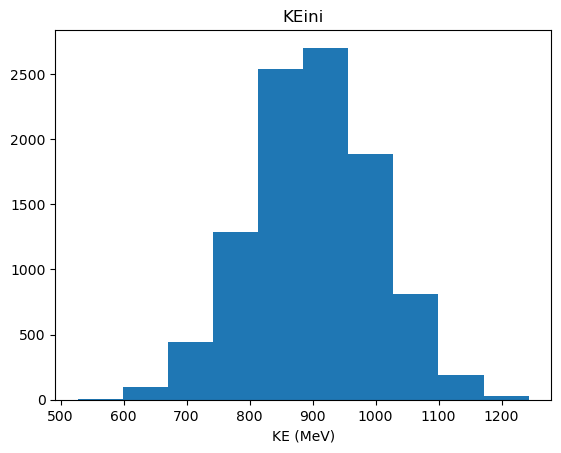

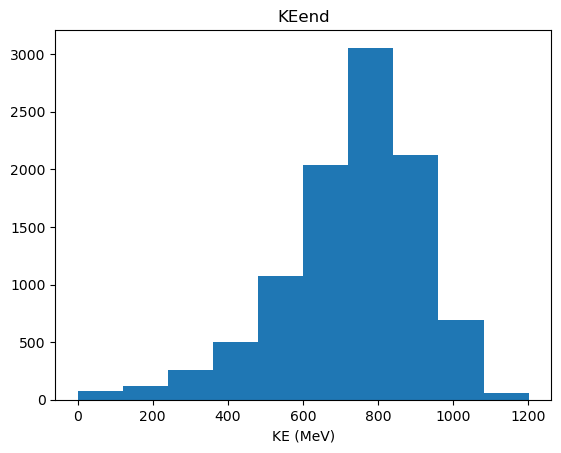

In [5]:
x_step = 0.1 # step size (cm)
Nevts = 10000 # number of events to be generated
print("Number of events:", Nevts)

trueKEi = np.random.normal(900, 100, Nevts) # initial energy of all events
trueKEf = [] # final energy of all events
int_type = [] # interaction type of all events

for ievt in range(Nevts):
    if (ievt%(10000*x_step)==0):
        print(f"  processing events {ievt}/{Nevts}...")
    KE, flag = interaction_sim(trueKEi[ievt], x_step)
    trueKEf.append(KE)
    int_type.append(flag)

trueKEf = np.array(trueKEf)
print("Sample generated.")

# plot the distribution of initial energy and final energy
plt.hist(trueKEi)
plt.xlabel("KE (MeV)")
plt.title("KEini")
plt.show()
plt.hist(trueKEf)
plt.xlabel("KE (MeV)")
plt.title("KEend")
plt.show()

### Extract cross-section using the truth information
The initial energy, final energy, and the interaction type for each simulated event are their truth information. We will use slicing method to calculate the cross-section using the truth information.

The reference below might be useful to understand the definition of the slice ID for initial histogram, end histogram, and interaction histogram.

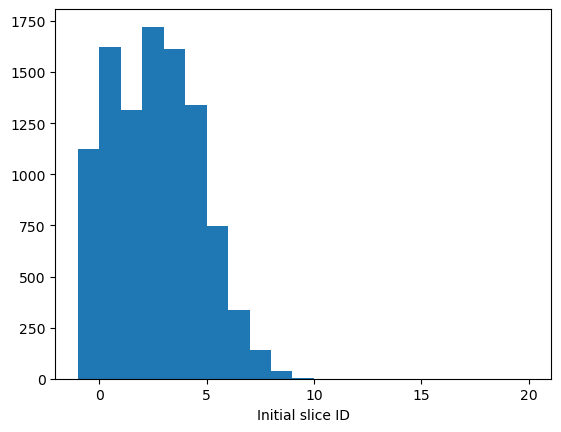

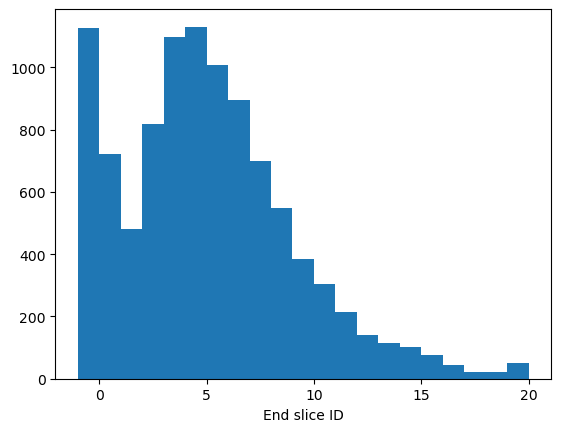

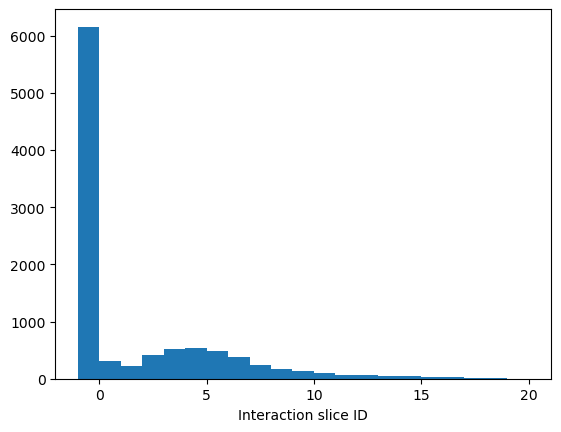

In [6]:
# define the energy binning
true_bins = np.array([1000,950,900,850,800,750,700,650,600,550,500,450,400,350,300,250,200,150,100,50,0])
Ntruebins = len(true_bins)
true_cKE = (true_bins[:-1] + true_bins[1:])/2 # energy bin centers
true_wKE = (true_bins[:-1] - true_bins[1:])/2 # energy bin half-width

# slice ID histograms using truth info 
# sliceID == 0 as underflow (too low KE); sliceID == Ntruebins-1 as overflow (too high KE); sliceID == -1 as unphysical bin (null value)
true_SIDini = []
true_SIDend = []
true_SIDint_ex = []
for ievt in range(Nevts):
    KE_ini = trueKEi[ievt]
    KE_end = trueKEf[ievt]
    intrcn = int_type[ievt]
    
    # derive the initial slice ID
    for SID_ini in range(Ntruebins-1):
        if true_bins[SID_ini] < KE_ini:
            break
            
    # derive the final slice ID
    for SID_end in range(Ntruebins-1):
        if true_bins[SID_end+1] < KE_end:
            break
    
    # remove incomplete slices
    if SID_end < SID_ini:
        SID_ini = -1
        SID_end = -1
        
    # derive the signal interaction slice ID
    SID_int_ex = SID_end
    if intrcn != 1:
        SID_int_ex = -1
        
    true_SIDini.append(SID_ini)
    true_SIDend.append(SID_end)
    true_SIDint_ex.append(SID_int_ex)
            
# plot the truth slice ID histograms
true_Nini,_,_ = plt.hist(true_SIDini, range(-1, Ntruebins))
plt.xlabel("Initial slice ID")
plt.show()
true_Nend,_,_ = plt.hist(true_SIDend, range(-1, Ntruebins))
plt.xlabel("End slice ID")
plt.show()
true_Nint_ex,_,_ = plt.hist(true_SIDint_ex, range(-1, Ntruebins))
plt.xlabel("Interaction slice ID")
plt.show()
true_Nini = true_Nini[1:]
true_Nend = true_Nend[1:]
true_Nint_ex = true_Nint_ex[1:]

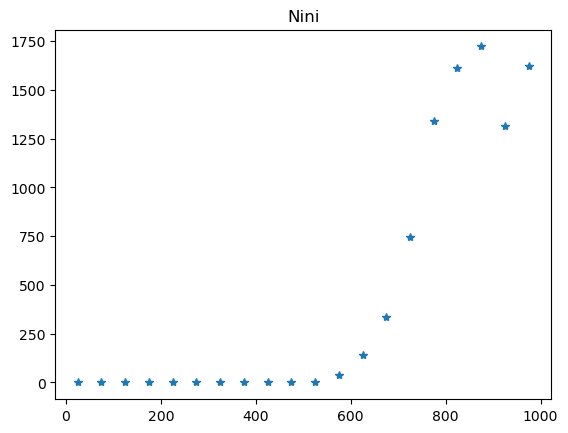

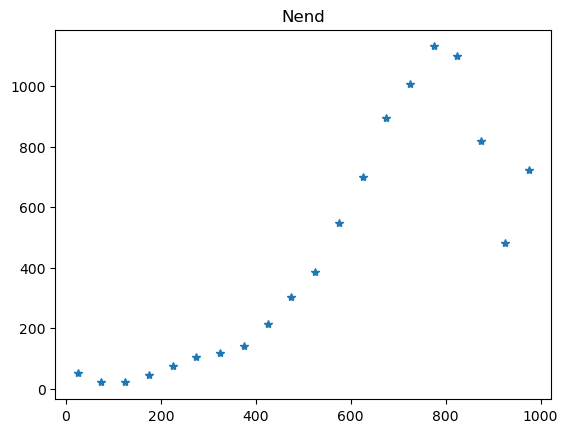

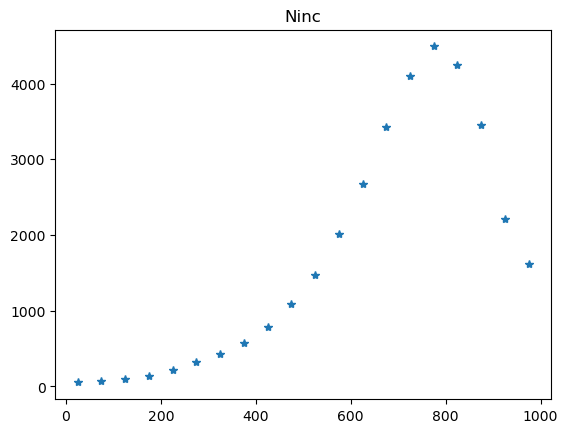

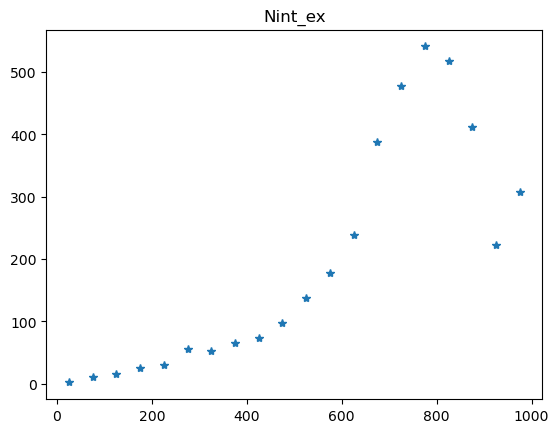

In [7]:
# derive the incident histogram
true_Ninc = np.zeros_like(true_Nini)
for ibin in range(Ntruebins-1): # again, the formula can be found in the reference below
    # two equivalent way to calculate the incident histogram
    for itmp in range(0, ibin+1):
        true_Ninc[ibin] += true_Nini[itmp]
    for itmp in range(0, ibin):
        true_Ninc[ibin] -= true_Nend[itmp]
    '''for itmp in range(ibin, Ntruebins-1):
        true_Ninc[ibin] += true_Nend[itmp]
    for itmp in range(ibin+1, Ntruebins-1):
        true_Ninc[ibin] -= true_Nini[itmp]'''

# plot the energy histograms, which will later be used directly to calculate XS
plt.plot(true_cKE, true_Nini, "*")
plt.title("Nini")
plt.show()
plt.plot(true_cKE, true_Nend, "*")
plt.title("Nend")
plt.show()
plt.plot(true_cKE, true_Ninc, "*")
plt.title("Ninc")
plt.show()
plt.plot(true_cKE, true_Nint_ex, "*")
plt.title("Nint_ex")
plt.show()

#### calculate the signal cross-section
$\sigma(E)=\frac{N_{\rm int}(E)}{nN_{\rm end}(E)\delta E}\frac{dE}{dx}(E)\ln\left(\frac{N_{\rm inc}(E)}{N_{\rm inc}(E)-N_{\rm end}(E)}\right)$

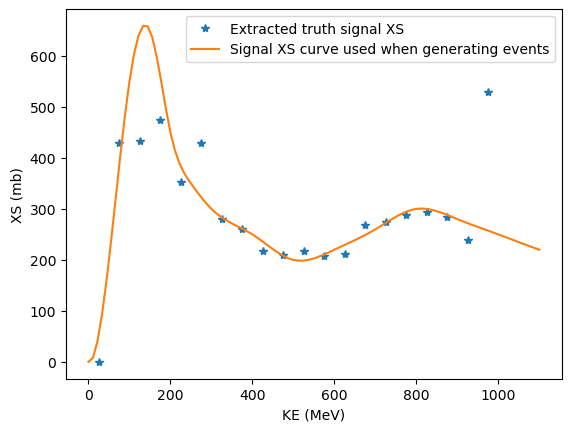

In [8]:
true_XS = np.zeros_like(true_Nini)
for ibin in range(Ntruebins-1):
    confact = dEdx_BB(true_cKE[ibin]) / (n_tar*true_wKE[ibin]*2) # pre-factor
    
    if true_Nend[ibin]!=0:
        rat_ex = true_Nint_ex[ibin]/true_Nend[ibin]
    else: rat_ex = 0
        
    if true_Ninc[ibin]>0 and true_Ninc[ibin]-true_Nend[ibin]>0:
        log_term = np.log(true_Ninc[ibin]/(true_Ninc[ibin]-true_Nend[ibin]))
    else: log_term = 0
        
    true_XS[ibin] = confact * rat_ex * log_term * 1e27
    
# plot the signal cross-section extracted using the truth info
plt.plot(true_cKE, true_XS, "*", label="Extracted truth signal XS") # TB updated with error bars
xx = np.linspace(0, 1100, 100)
plt.plot(xx,XS_gen_ex(xx), label="Signal XS curve used when generating events")
plt.xlabel("KE (MeV)")
plt.ylabel("XS (mb)") # 1 mb = 10^{-27} cm^2
plt.legend()
plt.show()

### To-do's
§ Add statistical error propogation

### References
§ Slicing method

Section 3 in https://www.overleaf.com/read/srmmtkznqhqh or Section 2 in https://www.preprints.org/manuscript/202306.0560/v1 (rather outdated)